<a href="https://colab.research.google.com/github/phoebecd/phoebecd/blob/main/fLiPS_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("flips_data.csv")
df

,Timestamp,How old are you?,What is your biological gender?,What is your race?,How much do you weigh in pounds?\nThis information will be used to calculate Body Mass Index.,What is your height?\nThis information will be used to calculate Body Mass Index.,How many people (NOT including yourself) live in your home?,How much do you pay for trainings weekly?,How long have you been skating in years?,What discipline(s) of skating do you participate in? (Check ALL that apply),...,"While performing, I frequently do not pay attention to what’s going on",Thoughts of doing poorly interfere with my concentration during competitions,I’m concerned about how I might perform under pressure,My heart races before or during a competition,I’m stressed about performing poorly,I’m worried about reaching my goal,My body feels tense,I’m concerned that others will be disappointed in my performance,"If you are under 15 years of age, do your guardians agree to your participation in this study?",To Skaters (all ages):
0,6/16/2024 11:00:01,14-16,Female,White,90-109,5'0 - 5'4,3-4,$100-300,1-3,Singles,...,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
1,6/16/2024 11:21:28,11-13,Female,Asian,Less than 70,4'11 and under,3-4,$100-300,4-7,"Singles, Excel",...,2.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,NaN,NaN
2,6/16/2024 11:30:32,20+,Male,White,150+,5'9 - 5'11,3-4,$300-$500,11+,Ice Dance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6/16/2024 11:35:22,17-19,Female,Asian,110-129,5'5 - 5'8,7+,$300-$500,11+,Singles,...,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN
4,6/16/2024 11:35:30,17-19,Female,Asian,130-149,5'0 - 5'4,5-6,Less than 100,8-10,Singles,...,2.0,2.0,3.0,4.0,3.0,2.0,2.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,8/18/2024 11:17:03,11-13,Female,White,90-109,5'0 - 5'4,3-4,$500-$1K,4-7,Singles,...,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,Yes,I hereby agree to participate in the study by ...
130,8/18/2024 11:25:27,17-19,Female,White,150+,5'5 - 5'8,1-2,$100-300,4-7,"Singles, Ice Dance, Excel",...,2.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,NaN,I hereby agree to participate in the study by ...
131,8/18/2024 22:59:05,14-16,Female,Asian,90-109,5'0 - 5'4,3-4,Less than 100,1-3,Singles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I hereby agree to participate in the study by ...
132,8/19/2024 2:19:09,11-13,Female,Asian,110-129,5'0 - 5'4,5-6,$100-300,8-10,Singles,...,2.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,Yes,I hereby agree to participate in the study by ...


In [ ]:
df.shape

(134, 95)

In [ ]:
df.drop('Timestamp', axis=1, inplace=True)
df

,How old are you?,What is your biological gender?,What is your race?,How much do you weigh in pounds?\nThis information will be used to calculate Body Mass Index.,What is your height?\nThis information will be used to calculate Body Mass Index.,How many people (NOT including yourself) live in your home?,How much do you pay for trainings weekly?,How long have you been skating in years?,What discipline(s) of skating do you participate in? (Check ALL that apply),What is the highest skating skills test (moves in the field) that you passed?,...,"While performing, I frequently do not pay attention to what’s going on",Thoughts of doing poorly interfere with my concentration during competitions,I’m concerned about how I might perform under pressure,My heart races before or during a competition,I’m stressed about performing poorly,I’m worried about reaching my goal,My body feels tense,I’m concerned that others will be disappointed in my performance,"If you are under 15 years of age, do your guardians agree to your participation in this study?",To Skaters (all ages):
0,14-16,Female,White,90-109,5'0 - 5'4,3-4,$100-300,1-3,Singles,Lower than Silver,...,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
1,11-13,Female,Asian,Less than 70,4'11 and under,3-4,$100-300,4-7,"Singles, Excel",Lower than Silver,...,2.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,NaN,NaN
2,20+,Male,White,150+,5'9 - 5'11,3-4,$300-$500,11+,Ice Dance,Lower than Silver,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17-19,Female,Asian,110-129,5'5 - 5'8,7+,$300-$500,11+,Singles,Gold (Senior),...,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN
4,17-19,Female,Asian,130-149,5'0 - 5'4,5-6,Less than 100,8-10,Singles,Gold (Senior),...,2.0,2.0,3.0,4.0,3.0,2.0,2.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,11-13,Female,White,90-109,5'0 - 5'4,3-4,$500-$1K,4-7,Singles,Gold (Senior),...,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,Yes,I hereby agree to participate in the study by ...
130,17-19,Female,White,150+,5'5 - 5'8,1-2,$100-300,4-7,"Singles, Ice Dance, Excel",Silver (Novice),...,2.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,NaN,I hereby agree to participate in the study by ...
131,14-16,Female,Asian,90-109,5'0 - 5'4,3-4,Less than 100,1-3,Singles,Lower than Silver,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I hereby agree to participate in the study by ...
132,11-13,Female,Asian,110-129,5'0 - 5'4,5-6,$100-300,8-10,Singles,Lower than Silver,...,2.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,Yes,I hereby agree to participate in the study by ...


In [ ]:
"""All weeks/hours columns are per week, warm-up time in min
# Scales always go 1(worst) and 5(best)
# Inches grown and weight changes are within a year
# always use w/ and other abbreviations
"""
df.columns = ['Age', 'Gender', 'Race', 'Weight', 'Height', 'Family', 'Cost', 'Years of skating', 'Discipline', 'Moves test',
              'Skating status', 'Other sports', 'Specific sport', 'Current level', 'Hiqhest competition', 'Number of competitions', 'Number of meals', 'Nutritional content', 'Eat whatever', 'Eat like others',
              'Eat given food', 'Fruits and veggies', 'Vitamins', 'Number of water bottles', 'Hours of sleep', 'Hours of on-ice', 'Days on-ice', 'Day off', 'Warm-up time', 'Forms of off-ice',
              'Hours of off-ice', 'Days of off-ice', 'Jump direction', 'Landed jumps', 'Hours of jumping on-ice', 'Hours of jumping off-ice', 'Safety in training environment', 'Comfort level w/ coach', 'Work appropriately w/ coach', 'Pressure from coach',
              'Pressure from family/team/self', 'Skate brand', 'Length of current skates', 'Skate customizations', 'Protection equipment', 'Inches grown', 'Weight changes', 'Intentionality of weight changes', 'Long-term illness', 'Specific illness',
              'Physical health scale', 'Happy w/ skating', 'Mental stress abt skating', 'Struggled w/ athletic responsibilities', 'Struggled w/ eating habits', 'Struggled w/ training schedule', 'Struggled w/ sleeping habits', 'Struggled balancing athletic/familiy duties', 'Sleep was negatively affected by stress', 'Anxiety affected daily living',
              'Feelings of loneliness', 'Living/training environment impact on mental health', 'Thoughts on eating/body image', 'Mental health conditions', 'Sought treatment', 'Weight perception', 'BAS-Body respect', 'BAS-Feel good abt body', 'BAS-Attentive to body needs', 'BAS-appreciate uniqueness of body',
              'Mental health scale', 'Skating-related injury', 'Currently injured', 'On or off ice injury', 'Side of body', 'Upper or lower body','Upper body specific', 'Lower body specific', 'Injury length', 'Reason for injury',
              'Medical help', 'CAS-Nerves when competing', 'CAS-Thinking unrelated things', 'CAS-doubt during comps', 'CAS-lack of attention', 'CAS-negative thoughts interfere w/ comp', 'CAS-concerned abt performance quality under pressure', 'CAS-heart races', 'CAS-stressed abt performing poorly', 'CAS-worried abbreaching goal',
              'CAS-body feels tense','CAS-concerned abt disappointing others', 'Parent consent', 'Skater consent']




In [ ]:
df

,Age,Gender,Race,Weight,Height,Family,Cost,Years of skating,Discipline,Moves test,...,CAS-lack of attention,CAS-negative thoughts interfere w/ comp,CAS-concerned abt performance quality under pressure,CAS-heart races,CAS-stressed abt performing poorly,CAS-worried abbreaching goal,CAS-body feels tense,CAS-concerned abt disappointing others,Parent consent,Skater consent
0,14-16,Female,White,90-109,5'0 - 5'4,3-4,$100-300,1-3,Singles,Lower than Silver,...,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
1,11-13,Female,Asian,Less than 70,4'11 and under,3-4,$100-300,4-7,"Singles, Excel",Lower than Silver,...,2.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,NaN,NaN
2,20+,Male,White,150+,5'9 - 5'11,3-4,$300-$500,11+,Ice Dance,Lower than Silver,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17-19,Female,Asian,110-129,5'5 - 5'8,7+,$300-$500,11+,Singles,Gold (Senior),...,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN
4,17-19,Female,Asian,130-149,5'0 - 5'4,5-6,Less than 100,8-10,Singles,Gold (Senior),...,2.0,2.0,3.0,4.0,3.0,2.0,2.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,11-13,Female,White,90-109,5'0 - 5'4,3-4,$500-$1K,4-7,Singles,Gold (Senior),...,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,Yes,I hereby agree to participate in the study by ...
130,17-19,Female,White,150+,5'5 - 5'8,1-2,$100-300,4-7,"Singles, Ice Dance, Excel",Silver (Novice),...,2.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,NaN,I hereby agree to participate in the study by ...
131,14-16,Female,Asian,90-109,5'0 - 5'4,3-4,Less than 100,1-3,Singles,Lower than Silver,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I hereby agree to participate in the study by ...
132,11-13,Female,Asian,110-129,5'0 - 5'4,5-6,$100-300,8-10,Singles,Lower than Silver,...,2.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,Yes,I hereby agree to participate in the study by ...


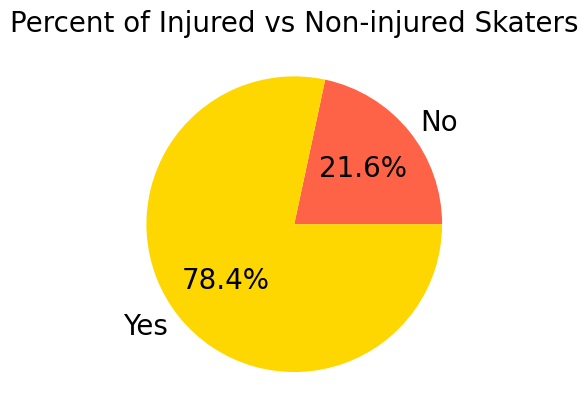

In [ ]:
df['Skating-related injury'].value_counts()
df.groupby('Skating-related injury').size().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 20}, colors=['tomato', 'gold'])
plt.title('Percent of Injured vs Non-injured Skaters', fontsize=20)
plt.show()

In [ ]:
injured = df[df['Skating-related injury'] == 'Yes']
not_injured = df[df['Skating-related injury'] == 'No']

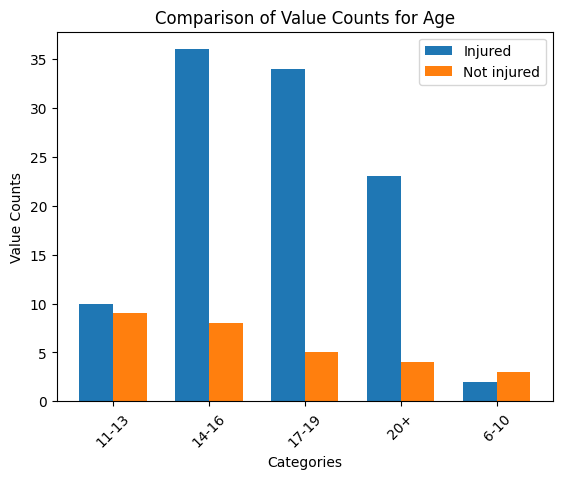

In [20]:
injured_counts = injured['Age'].value_counts()
not_injured_counts = not_injured['Age'].value_counts()
all_categories = injured_counts.index.union(not_injured_counts.index)
df1_counts = injured_counts.reindex(all_categories, fill_value=0)
df2_counts = not_injured_counts.reindex(all_categories, fill_value=0)

# Create the bar graph
bar_width = 0.35
index = range(len(all_categories))

plt.bar(index, df1_counts, bar_width, label='Injured')
plt.bar([i + bar_width for i in index], df2_counts, bar_width, label='Not injured')

plt.xlabel('Categories')
plt.ylabel('Value Counts')
plt.title('Comparison of Value Counts for Age')
plt.xticks([i + bar_width/2 for i in index], all_categories, rotation=45)
plt.legend()

plt.show()

